In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#загрузка csv-файла (датасет 'Students Performance in Exams' с kaggle.com)
students_df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#просмотр первых 5 строк DataFrame
students_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания:

    1. Предобработать данные
     - оценить валидность и корректность данных
     - оценить данные на наличие пропущенных значений, дубликатов и выбросов, обработать их
     - посчитать описательные статистики 
    2. Отобрать из исходных данных только тех учеников, которые успешно сдали все экзамены
    Значение общей суммы баллов и необходимого балла по каждому предмету определяется исходя из статистик данных
    3. Коррелируют ли баллы по разным предметам между собой?
    4. Влияет ли пол, этническая принадлежность и уровень образования родителей на баллы, полученные учеником на экзаменах?
    5. Эффективны ли подготовительные курсы?


# Предобработка данных 

In [4]:
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
students_df.shape

(1000, 8)

In [6]:
students_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
students_df.isnull().sum()
# пропущенных значений нет

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
students_df.isna().sum()
# пропущенных значений нет

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
students_df.duplicated().sum()
# дубликатов нет

0

In [10]:
students_df.describe()
# выбросов нет (нет отрицательных значений баллов)

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
for column in students_df:
    print(students_df[column].unique())
# просмотр уникальных значений в каждой колонке для визуальной оценки данных

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [12]:
#переименование столбцов (для того, чтобы к ним можно было обращаться через students_df.reading_score)
students_df = students_df.rename(columns = {'race/ethnicity':'race_ethnicity', 
                                           'parental level of education':'parental_level_of_education',
                                           'test preparation course':'test_preparation_course', 
                                           'math score':'math_score',
                                           'reading score':'reading_score', 
                                           'writing score':'writing_score'})

In [13]:
students_df
# переименование столбцов прошло успешно

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Выводы:
- данные были предобработаны, теперь они могут использоваться для анализа
- сырые данные были достаточно высокого качества (без пропусков, дубликатов, с правильно установленными типами данных), единственная проблема возникла с заголовками столбцов; проблема была успешно решена, заголовки столбцов были переименованы в соответствии с необходимым форматом

# Отбор учеников, успешно сдавших экзамены

In [14]:
# создание столбца total_score, который содержит в себе сумму баллов по трем дисциплинам
scores_columns = ['math_score', 'reading_score', 'writing_score']
total = students_df.get(scores_columns).agg(['sum'], axis=1)
total.rename(columns={'sum':'total_score'})
students_df['total_score'] = total

In [15]:
# описательные статистики данных
students_df.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


Text(0.5, 0.98, 'Распределение баллов по математике')

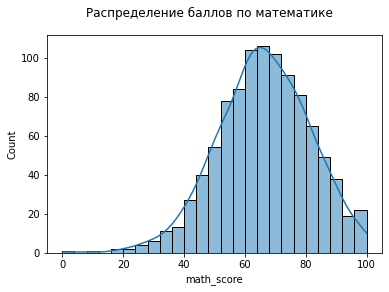

In [16]:
sns.histplot(students_df.math_score, kde=True)
plt.suptitle('Распределение баллов по математике')

Text(0.5, 0.98, 'Распределение баллов по чтению')

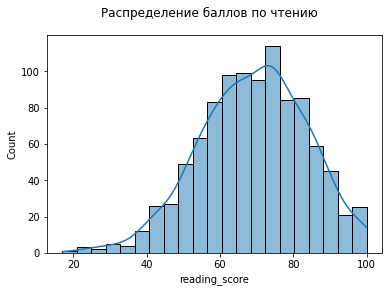

In [17]:
sns.histplot(students_df.reading_score, kde=True)
plt.suptitle('Распределение баллов по чтению')

Text(0.5, 0.98, 'Распределение баллов по письму')

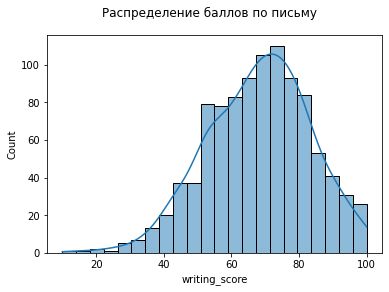

In [18]:
sns.histplot(students_df.writing_score, kde=True)
plt.suptitle('Распределение баллов по письму')

Text(0.5, 0.98, 'Распределение общей суммы баллов')

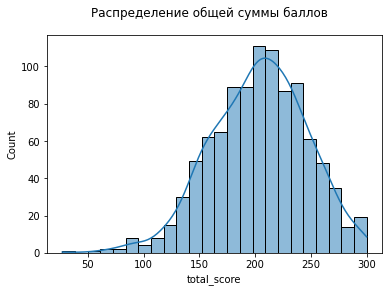

In [19]:
sns.histplot(students_df.total_score, kde=True)
plt.suptitle('Распределение общей суммы баллов')

Распределения отличаются от нормального: средние значения смещены вправо, т.е. больше учеников набирало в среднем от 50 до 100 баллов. Это подтверждается и таблицей с описательными статистиками, где приведены более точные данные

In [20]:
students_df.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


Значения общей суммы баллов ('total_score') и необходимых баллов по каждому предмету определяются 25-м процентилем. Такой выбор был сделан, поскольку значения 25-го процентиля сопоставимы со значениями баллов, используемых в реальных ситуациях для оценки сдачи/несдачи экзамена. Кроме того, стоит отметить, что это лишь разведывательный анализ данных; впоследствии пороговые значения могут быть изменены.

In [21]:
needed_math_score = students_df.math_score.quantile(0.25)
needed_reading_score = students_df.reading_score.quantile(0.25)
needed_writing_score = students_df.writing_score.quantile(0.25)
needed_total_score = students_df.total_score.quantile(0.25)
# сохранение пороговых значений баллов в специализированные переменные

In [22]:
# создание колонок math_passed, reading_passed, writing_passed и exam_passed, принимающих значения True/False 
# в зависимости от того сдал студент экзамен или нет (превышает ли набранное им количество баллов 25-й процентиль)
math_passed = students_df.get(['math_score'])
math_passed = math_passed.gt(needed_math_score)
math_passed.rename(columns={'math_score':'math_passed'})
students_df['math_passed'] = math_passed

reading_passed = students_df.get(['reading_score'])
reading_passed = reading_passed.gt(needed_reading_score)
reading_passed.rename(columns={'reading_score':'reading_passed'})
students_df['reading_passed'] = reading_passed

writing_passed = students_df.get(['writing_score'])
writing_passed = writing_passed.gt(needed_writing_score)
writing_passed.rename(columns={'writing_score':'writing_passed'})
students_df['writing_passed'] = writing_passed

total_passed = students_df.get(['total_score'])
total_passed = total_passed.gt(needed_total_score)
total_passed.rename(columns={'total_score':'exam_passed'})
students_df['exam_passed'] = total_passed

In [23]:
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_passed,reading_passed,writing_passed,exam_passed
0,female,group B,bachelor's degree,standard,none,72,72,74,218,True,True,True,True
1,female,group C,some college,standard,completed,69,90,88,247,True,True,True,True
2,female,group B,master's degree,standard,none,90,95,93,278,True,True,True,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,False,False,False,False
4,male,group C,some college,standard,none,76,78,75,229,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,True,True,True,True
996,male,group C,high school,free/reduced,none,62,55,55,172,True,False,False,False
997,female,group C,high school,free/reduced,completed,59,71,65,195,True,True,True,True
998,female,group D,some college,standard,completed,68,78,77,223,True,True,True,True


In [24]:
# cоздание DataFrame с учениками, успешно сдавшими все экзамены
passed_students_df = students_df.query('(math_passed == True) & (reading_passed == True) & (writing_passed == True) & (exam_passed == True)')

In [25]:
passed_students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_passed,reading_passed,writing_passed,exam_passed
0,female,group B,bachelor's degree,standard,none,72,72,74,218,True,True,True,True
1,female,group C,some college,standard,completed,69,90,88,247,True,True,True,True
2,female,group B,master's degree,standard,none,90,95,93,278,True,True,True,True
4,male,group C,some college,standard,none,76,78,75,229,True,True,True,True
5,female,group B,associate's degree,standard,none,71,83,78,232,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62,188,True,True,True,True
995,female,group E,master's degree,standard,completed,88,99,95,282,True,True,True,True
997,female,group C,high school,free/reduced,completed,59,71,65,195,True,True,True,True
998,female,group D,some college,standard,completed,68,78,77,223,True,True,True,True


In [26]:
# вычисление доли учеников, успешно сдавших экзамены
all_students = students_df.shape[0]
count_passed_students = passed_students_df.shape[0]
part_passed_students = count_passed_students / all_students * 100

In [27]:
part_passed_students

64.8

In [28]:
# загрузка данных о учениках, успешно сдавших экзамены, в csv-файл
passed_students_df.to_csv('passed_students.csv')

Выводы:
- были отобраны и сохранены в csv-файл ученики, успешно сдавшие экзамены по всем предметам
- успешно справились с экзаменами 648 учеников, что составляет 64.8% от общего количества экзаменуемых учеников

# Корреляция баллов по различным дисциплинам

In [29]:
students_df_subjects = students_df[['math_score', 'reading_score', 'writing_score']]

<AxesSubplot:>

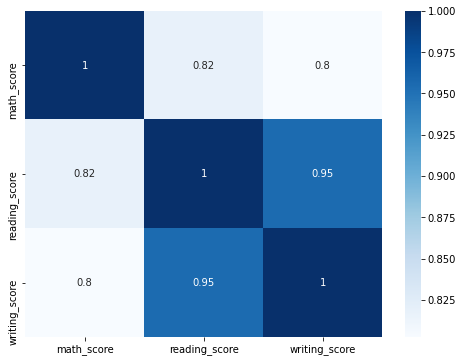

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(students_df_subjects.corr(), cmap='Blues', annot=True)

Выводы:
- баллы студентов по всем дисциплинам сильно коррелируют между собой. Корреляция положительная (значения коэффициента корреляции > 1), что свидетельствует о том, что чем больше баллов студент набирает по одному из предметов, тем больше баллов он наберет и по остальным. 
- наиболее сильно коррелируют баллы по чтению и письму, что вполне логично, ведь в основе обеих дисциплин лежит работа с текстом. 

# Влияние пола, этнической принадлежности и уровня образования родителей на баллы, полученные учеником на экзаменах

## Пол

Text(0.5, 0.98, 'Распределение студентов по полу')

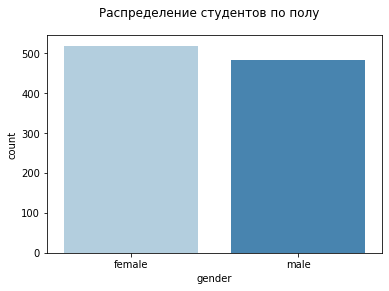

In [31]:
# построение столбчатой диаграммы, отражающей количество юношей и девушек в исходных данных
sns.countplot(data=students_df, x="gender", palette='Blues')
plt.suptitle('Распределение студентов по полу')

Количество юношей и девушек в исходных данных неодинаково; девушки преобладают (512 девушек, 482 юноши).

In [32]:
# создание DataFrame, содержащего обобщенные данные о баллах по различным предметам для юношей и девушек
gender_scores = students_df.groupby('gender', as_index=False) \
    .agg({'race_ethnicity':'count','math_score':'median', 'reading_score':'median', 'writing_score':'median', 'total_score':'median'}) \
    .round(1) \
    .rename(columns={'race_ethnicity':'number_of_people'})

In [33]:
gender_scores

,gender,number_of_people,math_score,reading_score,writing_score,total_score
0,female,518,65.0,73.0,74.0,211.0
1,male,482,69.0,66.0,64.0,199.0


Text(0.5, 0.98, 'Распределение баллов по математике в зависимости от пола')

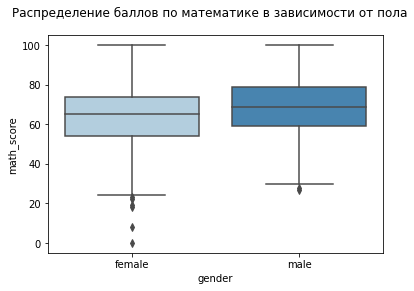

In [34]:
sns.boxplot(x="gender", y="math_score", data=students_df, palette='Blues')
plt.suptitle('Распределение баллов по математике в зависимости от пола')

Юноши имеют более высокую успеваемость по математике, баллы девушек несколько ниже. Кроме того, у девушек наблюдается несколько экстремально низких значений баллов (ниже 20). 

Text(0.5, 0.98, 'Распределение баллов по чтению в зависимости от пола')

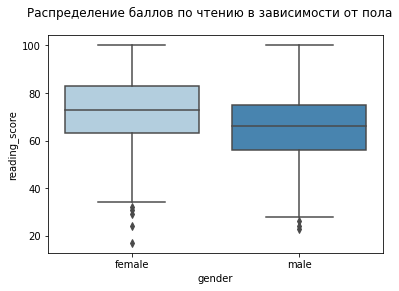

In [35]:
sns.boxplot(x="gender", y="reading_score", data=students_df, palette='Blues')
plt.suptitle('Распределение баллов по чтению в зависимости от пола')

По чтению девушки показывают более высокие результаты, чем юноши. Так, медианное значение баллов для девушек сопоставимо с 75-м процентилем баллов для юношей, однако у девушек наблюдается и больше экстремально низких значений баллов (выбросов). 

Text(0.5, 0.98, 'Распределение баллов по письму в зависимости от пола')

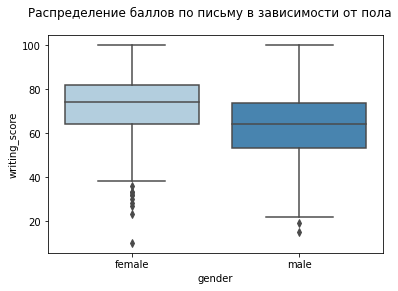

In [36]:
sns.boxplot(x="gender", y="writing_score", data=students_df, palette='Blues')
plt.suptitle('Распределение баллов по письму в зависимости от пола')

Аналогичная ситуация и с письмом: баллы девушек выше баллов юношей, медианное значение баллов девушек сопоставимо с 75-м процентилем баллов юношей. Вновь у девушек наблюдается большее количество выбросов.

Text(0.5, 0.98, 'Распределение общей суммы баллов в зависимости от пола')

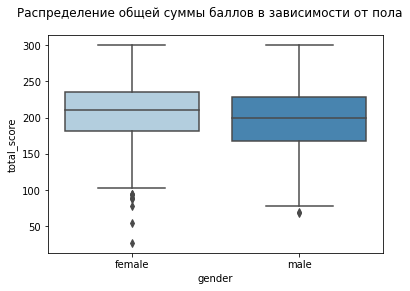

In [37]:
sns.boxplot(x="gender", y="total_score", data=students_df, palette='Blues')
plt.suptitle('Распределение общей суммы баллов в зависимости от пола')

Общая сумма баллов девушек незначительно превышает общую сумму баллов юношей. Тенденция к наличию большого количества выбросов у девушек продолжает прослеживаться.

Выводы:
- успеваемость учеников варьирует в зависимости от их пола
- девушки имеют более высокую успеваемость по всем дисциплинам, кроме математики
- баллы, набранные студентами по математике, ниже баллов, набранных по чтению и письму
- девушки чаще проваливают экзамены

## Этническая принадлежность

Text(0.5, 0.98, 'Распределение студентов по этнической принадлежности')

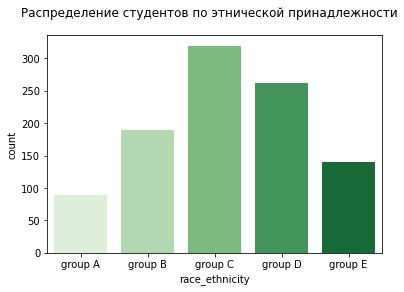

In [38]:
# построение столбчатой диаграммы, отражающей количество представителей различных этнических групп в исходных данных
sns.countplot(data=students_df, x="race_ethnicity", palette='Greens', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.suptitle('Распределение студентов по этнической принадлежности')

В распределении учеников по этническим группам наблюдается дисбаланс. Максимальное количество студентов относится к группам C и D, минимальное количество - к группам A и E. Наиболее близко к "эталонному" количеству человек находится группа B (чуть менее 200 при "эталонном" количестве 200).

In [39]:
# создание DataFrame, содержащего обобщенные данные о баллах по различным предметам для представителей различных этнических групп
ethnicity_scores = students_df.groupby('race_ethnicity', as_index=False) \
    .agg({'gender':'count', 'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean', 'total_score':'mean'}) \
    .round(1) \
    .rename(columns={'gender':'number_of_people'})

In [40]:
ethnicity_scores

,race_ethnicity,number_of_people,math_score,reading_score,writing_score,total_score
0,group A,89,61.6,64.7,62.7,189.0
1,group B,190,63.5,67.4,65.6,196.4
2,group C,319,64.5,69.1,67.8,201.4
3,group D,262,67.4,70.0,70.1,207.5
4,group E,140,73.8,73.0,71.4,218.3


In [41]:
# написание функции для добавления подписей к графикам
def add_labels(graph_name):
    for p in graph_name.patches:
        graph_name.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom', color= 'black', fontsize=12)

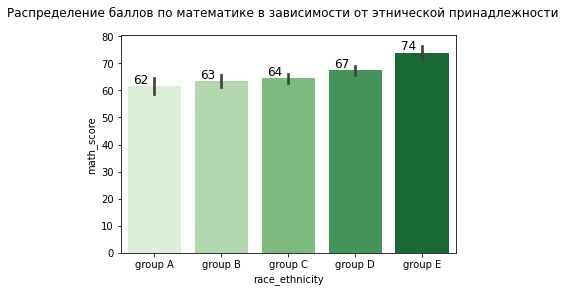

In [42]:
graph_ethnicity_math = sns.barplot(x="race_ethnicity", y="math_score", data=students_df, palette='Greens', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.suptitle('Распределение баллов по математике в зависимости от этнической принадлежности')

add_labels(graph_ethnicity_math)

От группы A к группе E успеваемость студентов увеличивается (на 12 баллов).

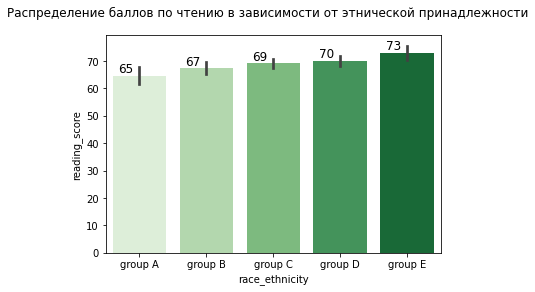

In [43]:
graph_ethnicity_reading = sns.barplot(x="race_ethnicity", y="reading_score", data=students_df, palette='Greens', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.suptitle('Распределение баллов по чтению в зависимости от этнической принадлежности')

add_labels(graph_ethnicity_reading)

Тенденция к увеличению баллов от группы A к группе E сохраняется (на 8 баллов).

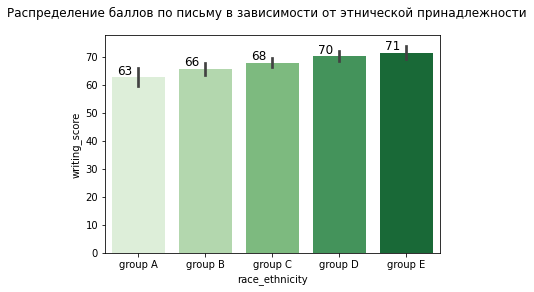

In [44]:
graph_ethnicity_writing = sns.barplot(x="race_ethnicity", y="writing_score", data=students_df, palette='Greens', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.suptitle('Распределение баллов по письму в зависимости от этнической принадлежности')

add_labels(graph_ethnicity_writing)

И вновь самая низкая успеваемость характерна для группы А, самая высокая - для группы Е (разность баллов между группами составляет 8).

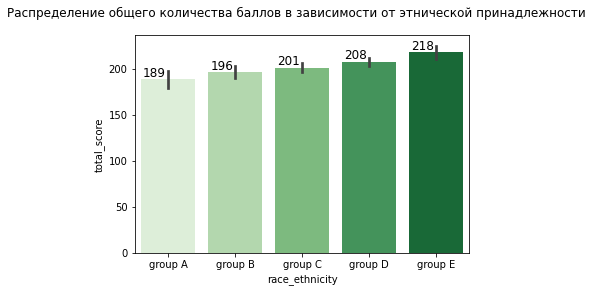

In [45]:
graph_ethnicity_total = sns.barplot(x="race_ethnicity", y="total_score", data=students_df, palette='Greens', order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.suptitle('Распределение общего количества баллов в зависимости от этнической принадлежности')

add_labels(graph_ethnicity_total)

Минимальное суммарное количество баллов у группы А, максимальное - у группы Е. Разность между максимальным и минимальным результатом составляет 29 баллов

Выводы:
- количество баллов, полученное на экзаменах студентами различных этнических групп, различается
- максимальное количество баллов по всем дисциплинам, а также максимальная общая сумма баллов были получены студентами группы Е
- затем баллы между группами распределялись следующим образом (от максимальных значений к минимальным): D -> C -> B -> A
- максимальная разность баллов между группами А и Е - по математике (12 баллов); по чтению и письму разность баллов одинакова (8 баллов)

## Уровень образования родителей

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

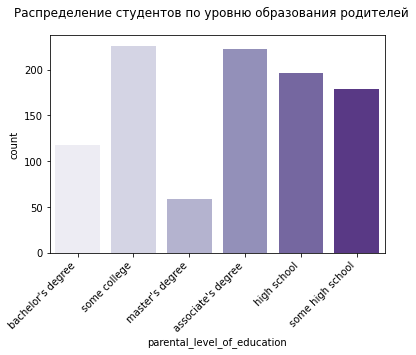

In [46]:
# построение столбчатой диаграммы, отражающей количество студентов, родители которых имеют определенный уровень образования 
parental_graph = sns.countplot(data=students_df, x="parental_level_of_education", palette='Purples')
plt.suptitle('Распределение студентов по уровню образования родителей')
plt.xticks(rotation=45, horizontalalignment='right')

Группы, сформированные в ходе распределения студентов по уровню образования родителей, имеют разный размер. Так, наибольшее количество студентов было определено в группы some college и associate degree, наименьшее - в группы master's degree и bachelor's degree. Другими словами, родители большей части студентов имеют среднее или неполное высшее образование, родители значительной части обучающихся - школьное образование, родители самой малозначительной группы студентов - степень бакалавра или магистра.

In [47]:
# создание DataFrame, содержащего обобщенные данные о баллах по различным предметам для представителей различных этнических групп
parents_education_scores = students_df.groupby('parental_level_of_education', as_index=False) \
    .agg({'gender':'count', 'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean', 'total_score':'mean'}) \
    .round(1) \
    .rename(columns={'gender':'number_of_people'})

In [48]:
parents_education_scores

,parental_level_of_education,number_of_people,math_score,reading_score,writing_score,total_score
0,associate's degree,222,67.9,70.9,69.9,208.7
1,bachelor's degree,118,69.4,73.0,73.4,215.8
2,high school,196,62.1,64.7,62.4,189.3
3,master's degree,59,69.7,75.4,75.7,220.8
4,some college,226,67.1,69.5,68.8,205.4
5,some high school,179,63.5,66.9,64.9,195.3


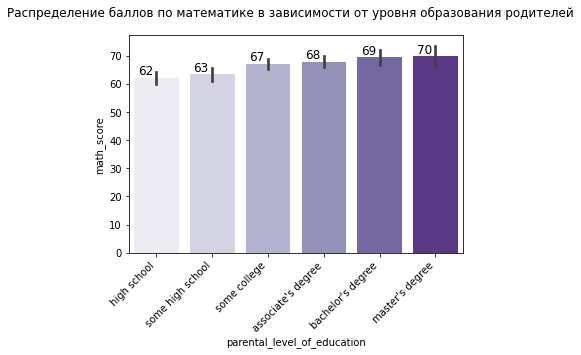

In [49]:
graph_parental_math = sns.barplot(x="parental_level_of_education", y="math_score", data=students_df, palette='Purples', 
                                  order=parents_education_scores.sort_values('math_score')['parental_level_of_education'])
plt.suptitle('Распределение баллов по математике в зависимости от уровня образования родителей')
plt.xticks(rotation=45, horizontalalignment='right')

add_labels(graph_parental_math)

Максимальные результаты по математике получили студенты, родители которых имеют степень бакалавра или магистра, минимальные - родители которых имеют школьное образование. Разница между результатами студентов составляет 8 баллов. 

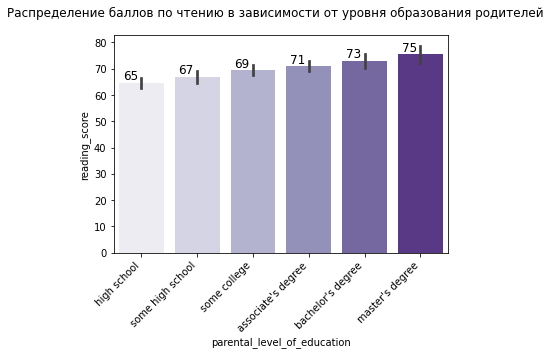

In [50]:
graph_parental_reading = sns.barplot(x="parental_level_of_education", y="reading_score", data=students_df, palette='Purples',
                                     order=parents_education_scores.sort_values('reading_score')['parental_level_of_education'])
plt.suptitle('Распределение баллов по чтению в зависимости от уровня образования родителей')
plt.xticks(rotation=45, horizontalalignment='right')

add_labels(graph_parental_reading)

Распределение баллов по чтению аналогично: наиболее высокая успеваемость наблюдается у студентов, родители которых имеют степень бакалавра/магистра, наиболее низкая - у студентов, родители которых имеют образование старшей школы. Размах составляет 10 баллов. 

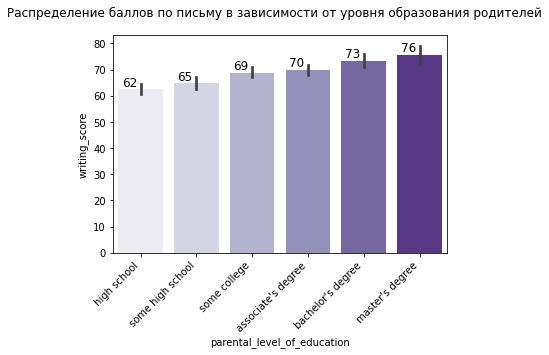

In [51]:
graph_parental_writing = sns.barplot(x="parental_level_of_education", y="writing_score", data=students_df, palette='Purples',
                                    order=parents_education_scores.sort_values('writing_score')['parental_level_of_education'])
plt.suptitle('Распределение баллов по письму в зависимости от уровня образования родителей')
plt.xticks(rotation=45, horizontalalignment='right')

add_labels(graph_parental_writing)

Вновь прослеживается тенденция, описанная выше: студенты, чьи родители окончили бакалавриат или магистратуру, справились с экзаменом успешнее, чем студенты, чьи родители окончили старшую школу. Разность между минимальным и максимальным результатом составляет 14 баллов. 

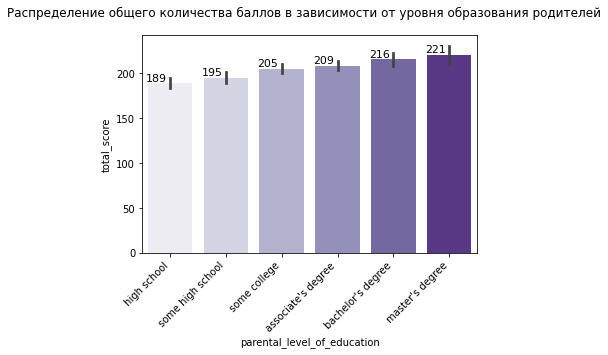

In [52]:
graph_parental_total = sns.barplot(x="parental_level_of_education", y="total_score", data=students_df, palette='Purples',
                                  order=parents_education_scores.sort_values('total_score')['parental_level_of_education'])
plt.suptitle('Распределение общего количества баллов в зависимости от уровня образования родителей')
plt.xticks(rotation=45, horizontalalignment='right')

for p in graph_parental_total.patches:
    graph_parental_total.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()),
                        ha='center', va='bottom', color= 'black', fontsize=11)

Закономерность остаётся прежней: максимальные суммы баллов у студентов, родители которых имеют степень бакалавра/магистра, минимальные - у студентов, родители которых имеют школьное образование. Размах составляет 32 балла. 

Выводы:
- студенты, родители которых имеют разный уровень образования, получили на экзаменах разное количество баллов
- студенты, родители которых имеют степень бакалавра или магистра, показали на экзаменах лучшие результаты, чем студенты, родители которых имеют школьное образование; эта тенденция прослеживается для всех предметов
- разность баллов, полученных студентами, родители которых окончили магистратуру, и студентами, родители которых окончили старушю школу, распределяется следующим образом (от большего к меньшему): письмо -> чтение -> математика 

# Эффективность подготовительных курсов

Text(0.5, 0.98, 'Разделение студентов на группы в зависимости от посещения подготовительных курсов')

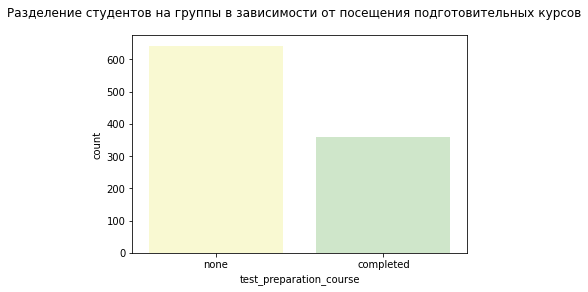

In [53]:
# построение столбчатой диаграммы, отражающей количество студентов, посещавших подготовительные курсы
sns.countplot(data=students_df, x="test_preparation_course", palette='Pastel1_r')
plt.suptitle('Разделение студентов на группы в зависимости от посещения подготовительных курсов')

In [54]:
# создание DataFrame, содержащего информацию о количестве студентов (не)прошедших курсы
students_courses = students_df.groupby('test_preparation_course', as_index=False).agg({'total_score':'count'})

In [55]:
students_courses

,test_preparation_course,total_score
0,completed,358
1,none,642


In [56]:
# расчёт доли студентов, прошедших подготовительные курсы
students_complete_course = students_courses.query('test_preparation_course == "completed"').total_score
students_complete_course_part = students_complete_course / all_students * 100

In [57]:
students_complete_course_part

0    35.8
Name: total_score, dtype: float64

Из 1000 студентов подготовительные курсы посещало 358 человек (35.8%)

In [58]:
# создание DataFrame, содержащего обобщенные данные о баллах по различным предметам для студентов (не)посещавших курсы
course_df = students_df.groupby('test_preparation_course', as_index=False) \
    .agg({'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean', 'total_score':'mean'}).round(2)

In [59]:
course_df

,test_preparation_course,math_score,reading_score,writing_score,total_score
0,completed,69.70,73.89,74.42,218.01
1,none,64.08,66.53,64.50,195.12


Text(0.5, 0.98, 'Распределение баллов по математике в зависимости от посещения подготовительных курсов')

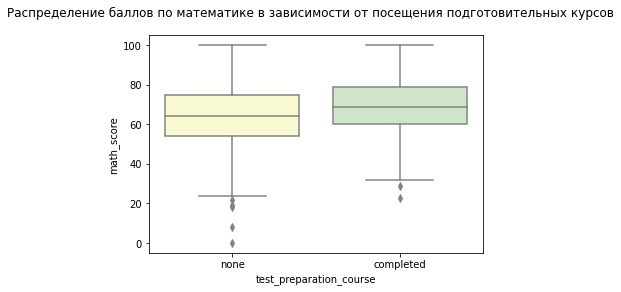

In [60]:
sns.boxplot(x='test_preparation_course', y='math_score', data=students_df, palette='Pastel1_r')
plt.suptitle('Распределение баллов по математике в зависимости от посещения подготовительных курсов')

Студенты, посещавшие подготовительные курсы, получили больше баллов на экзамене по математике. Кроме того, данные студенты значительно реже показывали экстремально низкие результаты (выбросы). 
Исходя из вышенаписанного можно сделать вывод о эффективности подготовительных курсов по математике.

Text(0.5, 0.98, 'Распределение баллов по чтению в зависимости от посещения подготовительных курсов')

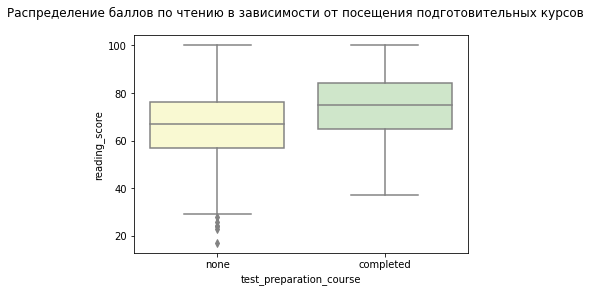

In [61]:
sns.boxplot(x='test_preparation_course', y='reading_score', data=students_df, palette='Pastel1_r')
plt.suptitle('Распределение баллов по чтению в зависимости от посещения подготовительных курсов')

Подготовительные курсы по чтению оказались еще более эффективными, чем курсы по математике, поскольку медианные значения баллов студентов, посещавших курсы, существенно выше медианных значений баллов не посещавших курсы студентов. Более того, студенты, посещавшие курсы, не получили экстремально низких баллов на экзамене (нет выбросов).

Text(0.5, 0.98, 'Распределение баллов по письму в зависимости от посещения подготовительных курсов')

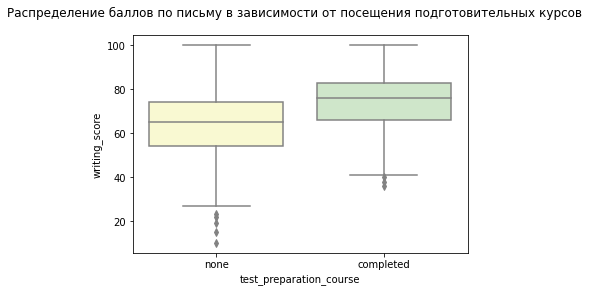

In [62]:
sns.boxplot(x='test_preparation_course', y='writing_score', data=students_df, palette='Pastel1_r')
plt.suptitle('Распределение баллов по письму в зависимости от посещения подготовительных курсов')

Аналогичная ситуация наблюдается и с экзаменом по письму: студенты, посещавшие курсы, показали гораздо более высокие результаты, чем студенты, их не посещавшие. Кроме того, даже студенты, которые посещали подготовительные курсы и получили экстремально низкие баллы (выбросы), показали гораздо более высокие результаты (около 40 баллов) по сравнению со студентами, не посещавшими курсы (около 30 баллов и меньше).

Text(0.5, 0.98, 'Распределение общего количества баллов в зависимости от посещения подготовительных курсов')

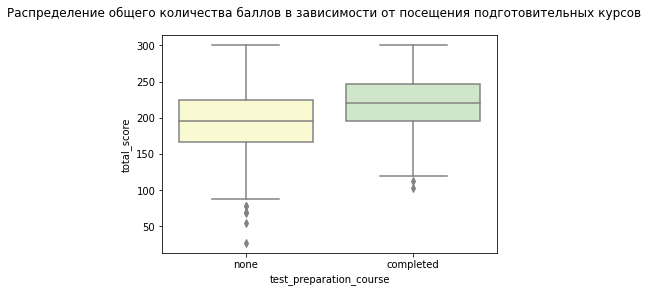

In [63]:
sns.boxplot(x='test_preparation_course', y='total_score', data=students_df, palette='Pastel1_r')
plt.suptitle('Распределение общего количества баллов в зависимости от посещения подготовительных курсов')

Общее количество баллов сильно варьирует: у студентов, посещавших подготовительные курсы, это значение заметно выше. Кроме того, студенты, посещавшие курсы, практически не показали экстремально низких результатов (выбросов). 

In [64]:
compare_course = course_df.iloc[0, 1:] - course_df.iloc[1, 1:]

In [65]:
compare_course

math_score        5.62
reading_score     7.36
writing_score     9.92
total_score      22.89
dtype: object

Выводы:
- подготовительные курсы оказались эффективны
- средние значения баллов по математике у посещавших курс студентов оказались выше на 5.62 балла
- по чтению - на 7.36 балла
- по письму - на 9.92 балла
- среднее значение общей суммы баллов студентов, посещавших подготовительные курсы, оказалось выше на 22.89 балла